> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Assignment 2

**Handin in Peergrade**: *Wednesday*, April 4, 2018, 23:59<br>
**Peergrading deadline**: *Sunday*, April 8, 2018, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, April 11, 2018, 23:59

[**Questions**](https://github.com/ulfaslak/computational_analysis_of_big_data_2018_spring/issues) **/** [**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 6

> **Ex. 6.0.1**: List three different real networks and state the nodes and links for each of them.

* Air Travel Network:

    Nodes -- airports
    
    Links -- travel routes
    
    
* Social Network:

    Nodes -- people
    
    Links -- relationships
    
    
* Food Chain/Network:

    Nodes -- species
    
    Links -- predator/prey relationship

> **Ex. 6.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

An example of a real network with many connections is a social network, since people for example can have thousands or even millions of followers or follow thousands of people. However, this network would still be considered sparse, because for it to be complete every person (or almost every) would need to be connected with every other person in the network, which is most certainly not the case.

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

#### 1. BA Description and How to Create One

According to Wikipedeia, two key properties of a BA network are "growth" and "preferential attachment". In other words, nodes that have a high degree (more connections/edges) are more likely to gain additional edges as the network continues to grow over time.

In order to create a BA network, nodes are added one at a time, and are connected to a certain number of other nodes (aka m <-- number of edges each node has after entire network is generated). Which nodes the new node is connected to is based on a probability determined by dividing the degree of a certain node by the sum of all the degrees of existing nodes (aka nodes with a higher degree will have a greater numerator, resulting in a greater probability of gaining another connections).

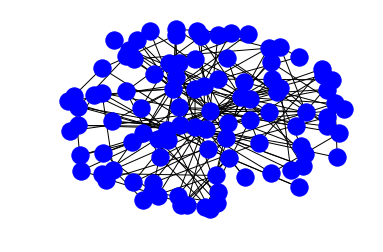

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

# 2. Generate a BA Network

#BA network with 100 nodes where m = 2 (number of edges from each node)
BAgraph = nx.barabasi_albert_graph(100, 2)

# 3. Plot the Network

pos = nx.spring_layout(BAgraph, k = 0.80)
# k size increases distance between nodes for easier visualization

nx.draw_networkx_nodes(BAgraph, pos, node_color = 'b')
nx.draw_networkx_edges(BAgraph, pos)

plt.axis('off')
plt.show()

In [3]:
#This is the ER Grpah from a previous quesiton that we will need later:
ERgraph = nx.erdos_renyi_graph(100, 0.1)


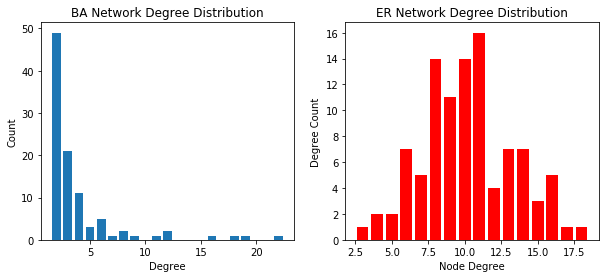

In [4]:
# 4. Degree Distribution

# G.degree() creates a dictionary of degree (d) for each (n)
## here we are pulling out the degrees
degree_sequence = sorted([d for n, d in BAgraph.degree()], reverse = True)

#count how many of each degree level we have
distribution = collections.Counter(degree_sequence)

#Counter results in a tuple; zip function allows us to split tuple into two separate lists
degree, count = zip(*distribution.items())

#change figure size
plt.figure(figsize=(10,4))

# Plot BA Network
plt.subplot(1,2,1)
plt.bar(degree, count)
plt.title("BA Network Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

#Plot ER Network for comparison
ERdegree_sequence = sorted([d for n, d in ERgraph.degree()], reverse = True)
ERdistribution = collections.Counter(ERdegree_sequence)
ER_degree, ER_count = zip(*ERdistribution.items())
plt.subplot(1,2,2)
plt.bar(ER_degree, ER_count, color = 'r')
plt.title("ER Network Degree Distribution")
plt.ylabel("Degree Count")
plt.xlabel("Node Degree")

plt.show()

#### 5. Compare BA and ER Network Degree Distributions

The main difference between the two networks is that the ER Network is more normally distributed than the BA Network. This makese sense, since ER Network is randomly generated, while the BA Network has preferential attachment. The BA Network has a large amount of nodes with a low degree (meaning few connections) and only a few nodes with greater degress, with one node having a much higher degree than the others.

#### 6. Other measures to describe the networks

Other measures we could have used to describe the BA and ER networks would be to find descriptive statistics (mean, median, range, mode, etc.) for their distributions. We could also come up with degree benchmark levels and color code the nodes based on these benchmarks to visually display the distributions in a different way, this time directly on the graphs in order to detect any patterns or trends. We might also consider trying to detect any clusters present in the networks.

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [5]:
# get_partnerships function from previous question

import re, os

def get_partners(char, faction=None):
    """Return list of partners for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("C:/Users/samhelen/Documents/Spring2018/Big_Data/Notebooks/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("C:/Users/samhelen/Documents/Spring2018/Big_Data/Notebooks/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get partner field
    partners_field = re.findall(r"partners[\w\W]+?\n", markup)
    if partners_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0][10:])]

In [6]:
# function to get partnerships for every character

def get_all_partnerships(faction=None):
    """Returns a list of character names (nodes) and a and character partnerships (edges)"""
    char_names = []
    char_edges = []
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("C:/Users/samhelen/Documents/Spring2018/Big_Data/Notebooks/%s" % faction)if c != ".DS_Store"]
            for char in faction_chars:
                if char not in char_names:
                    char_names.append(char)
                    if get_partners(char) != []:
                        partner_list = get_partners(char)
                        for partner in partner_list:
                            new_partner = (char, partner)
                            char_edges.append(new_partner)
    else:
        faction_chars = [c[:-4] for c in os.listdir("C:/Users/samhelen/Documents/Spring2018/Big_Data/Notebooks/%s" % faction)if c != ".DS_Store"]
        for char in faction_chars:
            if char not in char_names:
                char_names.append(char)
                if get_partners(char) != []:
                    partner_list = get_partners(char)
                    for partner in partner_list:
                        new_partner = (char, partner)
                        char_edges.append(new_partner)
                            
    return char_names, char_edges
                    

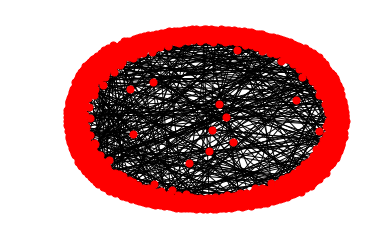

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# get a list of characters (nodes) and partnerships for each character (edges)
char_nodes, char_edges = get_all_partnerships()

# make Graph
char_Graph = nx.Graph()

# add nodes and edges
char_Graph.add_nodes_from(char_nodes)
# remove any duplicate edges
char_Graph.add_edges_from(set(char_edges))

# Draw graph
pos = nx.spring_layout(char_Graph, k=0.9)
nx.draw_networkx_nodes(char_Graph, pos, nodelist = char_nodes, node_size = 50)
nx.draw_networkx_edges(char_Graph, pos, edgelist = char_edges)


plt.axis('off')
plt.show()

In [8]:
from __future__ import division

print "Number of nodes:", len(char_Graph.nodes)
print "Number of edges:", len(char_Graph.edges)
print "Average Degree:", (sum(dict(char_Graph.degree()).values())/len(char_Graph.nodes))

Number of nodes: 2178
Number of edges: 469
Average Degree: 0.430670339761


> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

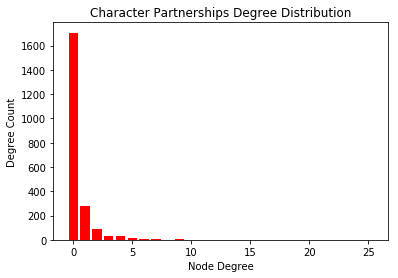

In [9]:
degree_sequence = sorted([d for n, d in char_Graph.degree()], reverse = True)

#count how many of each degree level we have
import collections
distribution = collections.Counter(degree_sequence)

#Counter results in a tuple; zip function allows us to split tuple into two separate lists
degree, count = zip(*distribution.items())

plt.bar(degree, count, color = 'r')
plt.title("Character Partnerships Degree Distribution")
plt.ylabel("Degree Count")
plt.xlabel("Node Degree")

plt.show()

> **Ex: 6.2.4**: Create a bar chart (similar in style to the one in Ex. 3.2.1) with the 10 most high-degree characters in each class. Make sure that each subfigure has the same y-axis (control with `plt.ylim` or use `plt.subplots` with parameter `sharey=True`).

In [10]:
# get partnerships for each class
hero_nodes, hero_edges = get_all_partnerships("heroes")
villain_nodes, villain_edges = get_all_partnerships("villains")
ambiguous_nodes, ambiguous_edges = get_all_partnerships("ambiguous")

# make graph for each
hero_Graph = nx.Graph()
hero_Graph.add_nodes_from(hero_nodes)
hero_Graph.add_edges_from(set(hero_edges))

villain_Graph = nx.Graph()
villain_Graph.add_nodes_from(villain_nodes)
villain_Graph.add_edges_from(set(villain_edges))

ambiguous_Graph = nx.Graph()
ambiguous_Graph.add_nodes_from(ambiguous_nodes)
ambiguous_Graph.add_edges_from(set(ambiguous_edges))

# 10 most high-degree characters for each class
connected_heroes = sorted(hero_Graph.degree, key=lambda x: x[1], reverse=True)[:10]
connected_villains = sorted(villain_Graph.degree, key=lambda x: x[1], reverse=True)[:10]
connected_ambiguous = sorted(ambiguous_Graph.degree, key=lambda x: x[1], reverse=True)[:10]

In [11]:
#separate names and degress
def separate_lists(listname):
    names = []
    degrees = []
    for char in listname:
        char_name, char_degree = char
        names.append(char_name)
        degrees.append(char_degree)
        
    return names, degrees

hero_names, hero_degrees = separate_lists(connected_heroes)
villain_names, villain_degrees = separate_lists(connected_villains)
ambiguous_names, ambiguous_degrees = separate_lists(connected_ambiguous)

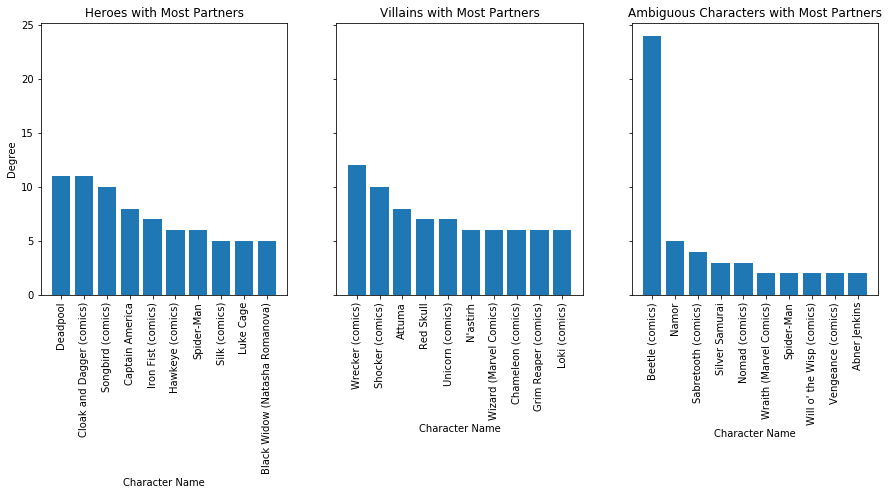

In [12]:
# Plot figures on same y-axis

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15, 5))
ax1.bar(range(len(hero_degrees)), hero_degrees)
ax1.set_xticks(range(len(hero_names)))
ax1.set_xticklabels(hero_names)
ax1.set_title('Heroes with Most Partners')
ax1.set_ylabel('Degree')
ax1.set_xlabel('Character Name')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2.bar(range(len(villain_degrees)), villain_degrees)
ax2.set_xticks(range(len(villain_names)))
ax2.set_xticklabels(villain_names)
ax2.set_title('Villains with Most Partners')
ax2.set_xlabel('Character Name')
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

ax3.bar(range(len(ambiguous_degrees)), ambiguous_degrees)
ax3.set_xticks(range(len(ambiguous_names)))
ax3.set_xticklabels(ambiguous_names)
ax3.set_title('Ambiguous Characters with Most Partners')
ax3.set_xlabel('Character Name')
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)


plt.show()

### Week 7

>**Ex. 7.1.1**: To make a word cloud you need some more or less clean text. For each character extract as cleanly as you can, the text written on their wikipage. Since the wikidata is kind of messy, there are some things you should be aware of when extracting the text.
* Exclude character names.
* Exclude links.
* Exclude numbers.
* Set everything to lower case.
* Do not include stopwords (use `nltk.corpus.stopwords.words("english")` to get a list of stopwords; install `nltk` to do this).

>Cleaning doesn't have to be perfect and can be done in a many different ways, these are just some things to look out for.

>Once you have extracted the text, create one long text string for all text written about heroes, another long text string for villains, and finally one for ambiguous characters. Using the code snippet below which shows how to plot a word cloud, plot the word clouds for each faction.

>        text = "some cool text"
>        wc = wordcloud.WordCloud(max_font_size=40).generate(text)
>        
>        plt.figure()
>        plt.imshow(wc, interpolation="bilinear")
>        plt.axis("off")
>        plt.show()

> You have to import `matplotlib.pylab` and `wordcloud` to do this. You can install `wordcloud` with anaconda by typing into your console

>        conda install -c conda-forge wordcloud

>or

>        sudo pip install wordcloud

>if you don't have Anaconda installed.

In [1]:
import nltk,os,numpy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Stephen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def getNewWords(character, faction):
    stop_words=nltk.corpus.stopwords.words("english")
    final_markdown=""
    path="../myBigData/%s"%faction
    with open(os.path.join(path, character), "r") as file1:
        markdown=file1.read()
        markdown=re.sub(r"\[\[(.*?)\]\]", "", markdown)
        markdown=re.sub(r"http", "", markdown)
        markdown=re.sub(r"\{\{(.*?)\}\}", "", markdown)
        markdown=re.sub(r"\d", "", markdown)
        markdown=re.sub(r"ref", "", markdown)
        markdown=markdown.lower()
        for word in stop_words:
            my_regex = r"\b(?=\w)" + re.escape(word) + r"\b(?!\w)"
            markdown=re.sub(my_regex, "", markdown)    
        return markdown

def createLists(faction):
    path="../myBigData/%s"%faction
    aggregate_list=[]
    for character in os.listdir(path):
        markdown=''
        markdown=getNewWords(character, faction)
        aggregate_list.append(markdown)
    return aggregate_list

hero_list=createLists("heroes")
villain_list=createLists("villains")
ambiguous_list=createLists("ambiguous")


In [6]:
def makeString(myList):
    myString=''
    for x in myList:
        myString+=x
    return myString

new_hero_words=makeString(hero_list)
new_villain_words=makeString(villain_list)
new_ambiguous_words=makeString(ambiguous_list)

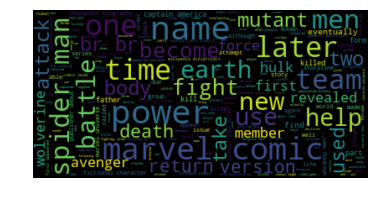

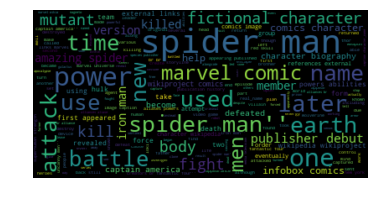

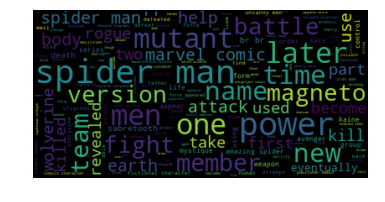

In [7]:
import matplotlib.pyplot as plt
import matplotlib.pylab, wordcloud

def makeWC(string):
    wc = wordcloud.WordCloud(max_font_size=40).generate(string)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
makeWC(new_hero_words)
makeWC(new_villain_words)
makeWC(new_ambiguous_words)

>**Ex. 7.2.1**: For each of the three character classes, compute the sentiment scores across wikipedia articles so that you can produce three histograms (one for each class) with sentiment scores. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

In [24]:
from afinn import Afinn
afinn = Afinn()

def getScore(myList):
    score=[]
    for x in myList:
        score.append(afinn.score(x))
    return score

hero_score=getScore(hero_list)
villain_score=getScore(villain_list)
ambiguous_score=getScore(ambiguous_list)

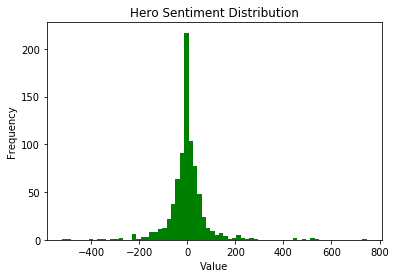

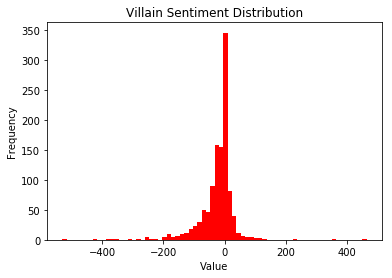

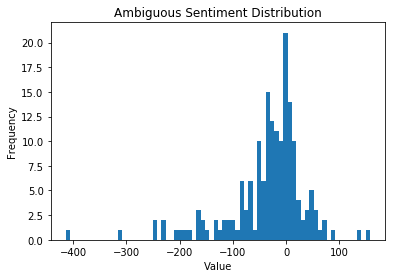

In [30]:
plt.hist(hero_score, bins=70, facecolor='green')
plt.title("Hero Sentiment Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(villain_score, bins=70, facecolor='red')
plt.title("Villain Sentiment Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(ambiguous_score, bins=70)
plt.title("Ambiguous Sentiment Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Week 8

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

In [4]:
from mrjob.job import MRJob

class MRWordCounter(MRJob):  

    def mapper(self, _, line):
        yield "chars", len(line)
        yield "words", len(line.split())
        yield "lines", 1

    def reducer(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    MRWordCounter.run()

usage: usage: __main__.py [options] [input files]
__main__.py: error: unrecognized arguments: -f


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.


    "chars"	88
    "lines"	4
    "words"	21

>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals how interconnected a network is, is computed as the number of realized triangles divided by the number of possible triangles.*

In [3]:
from mrjob.job import MRJob
from mrjob.step import MRStep


class NumberOfTriangles(MRJob):

    def mapper1(self, _, line):
        data = line.split()
        yield data[1], data[0]
        yield data[0], data[1]

    def reducer1(self, key, values):
        ret = key 
        for f in values: 
            ret = ret + " " + f 
        yield key, ret  


    def mapper2(self, key, values):
        data = values.split()
        head = data[0]
        value = data[1:]
        for let in value: 
            yield sorted(head+let), value

    def reducer2(self, key, values):
        friends = []
        for friend in values:
            friends.append(set(friend))
        yield key, list(set.intersection(*friends))

    def mapper3(self,key,values): 
        for val in values:
            yield 'common friends', 1 

    def reducer3(self,key,values): 
        yield 'triangles', sum(values)/3

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            ),
            MRStep(
                mapper=self.mapper3,
                reducer=self.reducer3
            ),
        ]

if __name__ == '__main__':
    NumberOfTriangles.run()

usage: usage: __main__.py [options] [input files]
__main__.py: error: unrecognized arguments: -f


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.


Results for our original commonfriends network: 
    
    "triangles"	7

Results for the anonymized facebook network: 

    "triangles"	64289

Results for the road segments in California: 

    "triangles"	6718

In [2]:
"Alex here hey guys"

'Alex here hey guys'

In [1]:
"poop"

'poop'